# Graphs

In [1]:
import Graph
import SelfOrganisingGraphs
from matplotlib import pyplot as plt
import networkx as nx
from sklearn import datasets

### Usage
The implementation for the Self-Organising-Maps can take any Graph as input. Users can define graphs themselves, or
generate square- or hexagonal grids using the built-in methods (example below). In a square grid graph a node is
connected to its direct dimensional neighbours.

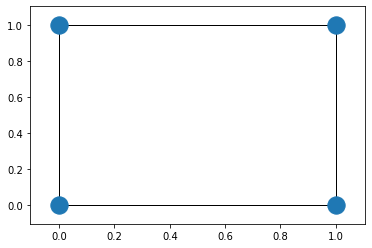

In [2]:
grid2x2 = Graph.create_grid((2,2))
nx_graph = grid2x2.to_nx_graph()

fig, ax = plt.subplots()
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()
plt.close(fig)

In [3]:
# Create a 4 dimensional square-grid graph of shape (10,8,7,5)
square_grid = Graph.create_grid((10,8,7,5))
print(f"The nodes of the graph have shape {square_grid.nodes.shape}, "
      f"with a total of {len(square_grid.nodes.flatten())} nodes")

print(f"\nThe neighbours of node at coordinates (1,1,1,1) are:")
for node in square_grid.nodes[(1,1,1,1)].neighbours:
    print(f"    Node at position - {node.coordinates}")

The nodes of the graph have shape (10, 8, 7, 5), with a total of 2800 nodes

The neighbours of node at coordinates (1,1,1,1) are:
    Node at position - (0.0, 1.0, 1.0, 1.0)
    Node at position - (1.0, 0.0, 1.0, 1.0)
    Node at position - (1.0, 1.0, 0.0, 1.0)
    Node at position - (1.0, 1.0, 1.0, 0.0)
    Node at position - (2.0, 1.0, 1.0, 1.0)
    Node at position - (1.0, 2.0, 1.0, 1.0)
    Node at position - (1.0, 1.0, 2.0, 1.0)
    Node at position - (1.0, 1.0, 1.0, 2.0)


Note that the coordinates of nodes correspond to their location in the grid, with a step size of 1. If a different step
size is desired this can be changed in the ```create_grid()``` function using the ```coord_scale``` parameter (default
is 1).

**Important**: The ```coord_scale``` needs to be set at a positive or negative value which is not 0.

Different graphs can be created by the user for the SOM algorithm. below is an example of a graph consisting of 2
unconnected lines:

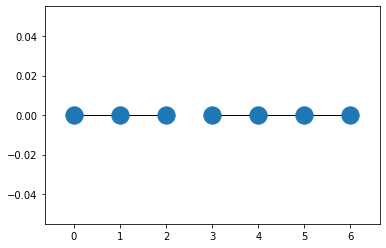

In [8]:
# In order to plot the graphs using networkX the coordinates need to be 2 dimensional
def make_lines() :
    g = Graph.Graph(7, dimensions=2)

    g.nodes[1].connect(g.nodes[0])
    g.nodes[1].connect(g.nodes[2])
    g.nodes[4].connect(g.nodes[3])
    g.nodes[4].connect(g.nodes[5])
    g.nodes[5].connect(g.nodes[6])

    return g

lines = make_lines()

nx_graph = lines.to_nx_graph()
fig, ax = plt.subplots()
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()
plt.close(fig)

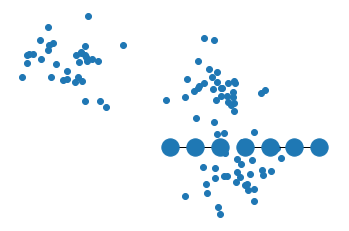

Completed epoch
Completed epoch
Completed epoch
Completed epoch
Completed epoch
Completed epoch
Completed epoch
Completed epoch
Completed epoch
Completed epoch


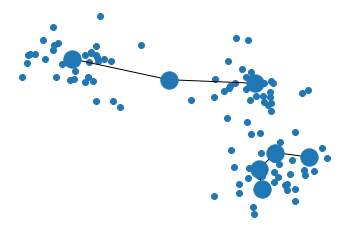

In [10]:
lines = make_lines()
nx_graph = lines.to_nx_graph()
x, y = datasets.make_blobs(random_state=47, center_box=(-5,5))
plt.scatter(x[:, 0], x[:, 1])
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
plt.show()
plt.close()


som = SelfOrganisingGraphs.SOM(lines)
som.fit(x)
nx_graph = lines.to_nx_graph()
plt.scatter(x[:, 0], x[:, 1])
nx.draw(nx_graph, nx.get_node_attributes(nx_graph,'pos'))
plt.show()
plt.close()